In [1]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler\

import keras_tuner as kt

c:\Code\Malik\venv\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Code\Malik\venv\Lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.11.0 and strictly below 2.14.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.14.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a

In [2]:
CSV_HEADER = [
 'Status of aneurysm_Ruptured',
 'Diabetes',
 'Hypertension',
 'Heart Disease',
 'COPD',
 'Polycystic Kidney Disese',
 'Family_history',
 'Gender_Female',
 'Gender_Male',
 'Gender_Transgender Female / Male-to-Female',
 'Side_Bilateral',
 'Side_Left',
 'Side_Right',
 'Side_Unknown',
 'Side_at Bifurcation',
 'Smoking History_Current Smoker',
 'Smoking History_Former Smoker',
 'Smoking History_Never Smoked',
 'diplopia_No',
 'diplopia_Unknown',
 'diplopia_Yes',
 'blurred vision_No',
 'blurred vision_Unknown',
 'blurred vision_Yes',
 #'New_Loc_Anterior Communicating Artery',
 #'New_Loc_BA SCA',
 #'New_Loc_Basilar Tip',
 #'New_Loc_Basilar Trunk',
 #'New_Loc_Carotid Terminus',
 #'New_Loc_Cavernous Carotid',
 #'New_Loc_Distal Branch',
 #'New_Loc_Extra-Cranial: Internal Carotid',
 #'New_Loc_ICA',
 #'New_Loc_MCA',
 #'New_Loc_PCA',
 #'New_Loc_PICA',
 #'New_Loc_Paraclinoid',
 #'New_Loc_Pericallosal',
 #'New_Loc_SICA',
 #'New_Loc_Vertebral Artery',
 'age_category_Baby Boomers',
 'age_category_Gen - X',
 'age_category_Gen - Y',
 'age_category_Silent Generation',
 'size_category_giant',
 'size_category_large',
 'size_category_medium',
 'size_category_small',
 'size_category_tiny',
 'Ethnicity_Asian/Oriental',
 'Ethnicity_Black/African American',
 'Ethnicity_Native American/American Indian',
 'Ethnicity_White/Caucasian'
]

print("Len CSV_HEADER: " + str(len(CSV_HEADER)))

Len CSV_HEADER: 37


In [3]:
LOCATION = "ACA"

In [4]:


data = pd.read_csv(f"./data/tab_aneurysm_data_{LOCATION}.csv", header=None, names=CSV_HEADER)

data = data[1:]

X = data.drop(['Status of aneurysm_Ruptured'], axis=1)
y = data['Status of aneurysm_Ruptured']

#oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
#X, y = oversample.fit_resample(X, y)

# Perform the train-test split (70% train, 30% combined validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=4)

# Further split the temporary set into validation and test sets (50% validation, 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Save the training and testing data to CSV files
train_data = pd.concat([y_train, X_train], axis=1)
test_data = pd.concat([y_test, X_test], axis=1)
val_data = pd.concat([y_val, X_val], axis=1)

print(f"Train dataset shape: {train_data.shape}")
print(f"Test dataset shape: {test_data.shape}")
print(f"Val dataset shape: {val_data.shape}")

y.value_counts()

Train dataset shape: (456, 37)
Test dataset shape: (98, 37)
Val dataset shape: (98, 37)


Status of aneurysm_Ruptured
ruptured      326
unruptured    326
Name: count, dtype: int64

In [5]:
train_data_file = "train_data_An.csv"
test_data_file = "test_data_An.csv"
val_data_file = "val_data_An.csv"

train_data.to_csv(train_data_file, index=False, header=False)
test_data.to_csv(test_data_file, index=False, header=False)
val_data.to_csv(val_data_file, index=False, header=False)

In [6]:
train_data.head()

,Status of aneurysm_Ruptured,Diabetes,Hypertension,Heart Disease,COPD,Polycystic Kidney Disese,Family_history,Gender_Female,Gender_Male,Gender_Transgender Female / Male-to-Female,...,age_category_Silent Generation,size_category_giant,size_category_large,size_category_medium,size_category_small,size_category_tiny,Ethnicity_Asian/Oriental,Ethnicity_Black/African American,Ethnicity_Native American/American Indian,Ethnicity_White/Caucasian
62,unruptured,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
423,ruptured,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
147,unruptured,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
617,ruptured,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
133,unruptured,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [7]:
NUMERIC_FEATURE_NAMES = [
]

CATEGORICAL_FEATURES_WITH_VOCABULARY={}
for feature in CSV_HEADER[1:]: #Not including Rupture Status
    CATEGORICAL_FEATURES_WITH_VOCABULARY[feature]=sorted(list(data[feature].unique()))

# Name of the column to be used as instances weight.
WEIGHT_COLUMN_NAME = "fnlwgt"
# A list of the categorical feature names.
CATEGORICAL_FEATURE_NAMES = list(CATEGORICAL_FEATURES_WITH_VOCABULARY.keys())
# A list of all the input features.
FEATURE_NAMES = NUMERIC_FEATURE_NAMES + CATEGORICAL_FEATURE_NAMES
# A list of column default values for each feature.
COLUMN_DEFAULTS = [
    ["NA"] for feature_name in CSV_HEADER
]
# The name of the target feature.
TARGET_FEATURE_NAME = "Status of aneurysm_Ruptured"
# A list of the labels of the target features.
TARGET_LABELS = ["ruptured", "unruptured"]

In [8]:
CATEGORICAL_FEATURES_WITH_VOCABULARY

{'Diabetes': ['0', '1'],
 'Hypertension': ['0', '1'],
 'Heart Disease': ['0', '1'],
 'COPD': ['0', '1'],
 'Polycystic Kidney Disese': ['0', '1'],
 'Family_history': ['0', '1'],
 'Gender_Female': ['0', '1'],
 'Gender_Male': ['0', '1'],
 'Gender_Transgender Female / Male-to-Female': ['0', '1'],
 'Side_Bilateral': ['0', '1'],
 'Side_Left': ['0', '1'],
 'Side_Right': ['0', '1'],
 'Side_Unknown': ['0', '1'],
 'Side_at Bifurcation': ['0', '1'],
 'Smoking History_Current Smoker': ['0', '1'],
 'Smoking History_Former Smoker': ['0', '1'],
 'Smoking History_Never Smoked': ['0', '1'],
 'diplopia_No': ['0', '1'],
 'diplopia_Unknown': ['0', '1'],
 'diplopia_Yes': ['0', '1'],
 'blurred vision_No': ['0', '1'],
 'blurred vision_Unknown': ['0', '1'],
 'blurred vision_Yes': ['0', '1'],
 'age_category_Baby Boomers': ['0', '1'],
 'age_category_Gen - X': ['0', '1'],
 'age_category_Gen - Y': ['0', '1'],
 'age_category_Silent Generation': ['0', '1'],
 'size_category_giant': ['0', '1'],
 'size_category_large'

In [9]:
LEARNING_RATE = 0.001
WEIGHT_DECAY = 0.0001
DROPOUT_RATE = 0.2
BATCH_SIZE = 32
NUM_EPOCHS = 30

NUM_TRANSFORMER_BLOCKS = 5  # Number of transformer blocks.
NUM_HEADS = 4  # Number of attention heads.
EMBEDDING_DIMS = 16  # Embedding dimensions of the categorical features.
MLP_HIDDEN_UNITS_FACTORS = [
    2,
    1,
]  # MLP hidden layer units, as factors of the number of inputs.
NUM_MLP_BLOCKS = 2  # Number of MLP blocks in the baseline model.

In [10]:
target_label_lookup = layers.StringLookup(
    vocabulary=TARGET_LABELS, mask_token=None, num_oov_indices=0
)

def prepare_example(features, target):
    # print(target)
    target_index = target_label_lookup(target)
    return features, target_index


def get_dataset_from_csv(csv_file_path, batch_size=128, shuffle=False):
    dataset = tf.data.experimental.make_csv_dataset(
        csv_file_path,
        batch_size=batch_size,
        column_names=CSV_HEADER,
        column_defaults=COLUMN_DEFAULTS,
        label_name=TARGET_FEATURE_NAME,
        num_epochs=1,
        header=False,
        na_value="?",
        shuffle=False,
    ).map(prepare_example, num_parallel_calls=tf.data.AUTOTUNE, deterministic=False)
    return dataset.cache()

In [11]:
np.random.seed(0)
tf.random.set_seed(0)
keras.utils.set_random_seed(1)

In [12]:
#dataset = get_dataset_from_csv("train_data_An.csv")
#iterator = dataset.as_numpy_iterator()
#
#try:
#    while True:
#        data_batch = next(iterator)
#        print(data_batch)
#except StopIteration:
#    # This exception will be raised when the iterator is exhausted
#    print("No more elements in the dataset.")

In [13]:
from keras import backend as K
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall_keras = true_positives / (possible_positives + K.epsilon())
    return recall_keras
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision_keras = true_positives / (predicted_positives + K.epsilon())
    return precision_keras
def negative_predictive_value(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))
    return tn / (tn + fn + K.epsilon())

from sklearn.metrics import roc_auc_score
def get_auroc(y_true, y_pred):
    return tf.numpy_function(roc_auc_score, (y_true, y_pred), tf.double)

In [14]:
def run_experiment(
    model,
    train_data_file,
    test_data_file,
    val_data_file,
    num_epochs,
    learning_rate,
    weight_decay,
    batch_size,
):

    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.BinaryCrossentropy(),
        metrics=[keras.metrics.BinaryAccuracy(name="accuracy"), get_f1,precision,recall],
    )

    train_dataset = get_dataset_from_csv(train_data_file, batch_size, shuffle=False)
    test_dataset = get_dataset_from_csv(test_data_file, batch_size)
    validation_dataset = get_dataset_from_csv(val_data_file, batch_size)

    print("Start training the model...")
    history = model.fit(
        train_dataset, epochs=num_epochs, validation_data=validation_dataset
    )
    print("Model training finished")

    _, accuracy, f1,prec,rec = model.evaluate(test_dataset, verbose=0)
    

    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test f1: {round(f1,6)}")
    print(f"Test accuracy: {round(accuracy,6)}")
    print(f"Test Precision: {round(prec,6 )}")
    print(f"Test Recall: {round(rec,6)}")

    return history

In [15]:
def create_model_inputs():
    inputs = {}
    for feature_name in FEATURE_NAMES:
        if feature_name in NUMERIC_FEATURE_NAMES:
            inputs[feature_name] = layers.Input(
                name=feature_name, shape=(), dtype=tf.float32
            )
        else:
            inputs[feature_name] = layers.Input(
                name=feature_name, shape=(), dtype=tf.string
            )
    return inputs

In [16]:
def encode_inputs(inputs, embedding_dims):

    encoded_categorical_feature_list = []
    numerical_feature_list = []

    for feature_name in inputs:
        if feature_name in CATEGORICAL_FEATURE_NAMES:

            # Get the vocabulary of the categorical feature.
            vocabulary = CATEGORICAL_FEATURES_WITH_VOCABULARY[feature_name]

            # Create a lookup to convert string values to an integer indices.
            # Since we are not using a mask token nor expecting any out of vocabulary
            # (oov) token, we set mask_token to None and  num_oov_indices to 0.
            lookup = layers.StringLookup(
                vocabulary=vocabulary,
                mask_token=None,
                num_oov_indices=0,
                output_mode="int",
            )

            # Convert the string input values into integer indices.
            encoded_feature = lookup(inputs[feature_name])

            # Create an embedding layer with the specified dimensions.
            embedding = layers.Embedding(
                input_dim=len(vocabulary), output_dim=embedding_dims
            )

            # Convert the index values to embedding representations.
            encoded_categorical_feature = embedding(encoded_feature)
            encoded_categorical_feature_list.append(encoded_categorical_feature)

        else:

            # Use the numerical features as-is.
            numerical_feature = tf.expand_dims(inputs[feature_name], -1)
            numerical_feature_list.append(numerical_feature)

    return encoded_categorical_feature_list, numerical_feature_list

In [17]:
def create_mlp(hidden_units, dropout_rate, activation, normalization_layer, name=None):

    mlp_layers = []
    for units in hidden_units:
        mlp_layers.append(normalization_layer),
        mlp_layers.append(layers.Dense(units, activation=activation))
        mlp_layers.append(layers.Dropout(dropout_rate))

    return keras.Sequential(mlp_layers, name=name)

In [18]:
def create_baseline_model(
    embedding_dims, num_mlp_blocks, mlp_hidden_units_factors, dropout_rate
):

    # Create model inputs.
    inputs = create_model_inputs()
    # encode features.
    encoded_categorical_feature_list, numerical_feature_list = encode_inputs(
        inputs, embedding_dims
    )
    # Concatenate all features.
    features = layers.concatenate(
        encoded_categorical_feature_list + numerical_feature_list
    )
    # Compute Feedforward layer units.
    feedforward_units = [features.shape[-1]]

    # Create several feedforwad layers with skip connections.
    for layer_idx in range(num_mlp_blocks):
        features = create_mlp(
            hidden_units=feedforward_units,
            dropout_rate=dropout_rate,
            activation=keras.activations.gelu,
            normalization_layer=layers.LayerNormalization(epsilon=1e-6),
            name=f"feedforward_{layer_idx}",
        )(features)

    # Compute MLP hidden_units.
    mlp_hidden_units = [
        factor * features.shape[-1] for factor in mlp_hidden_units_factors
    ]
    # Create final MLP.
    features = create_mlp(
        hidden_units=mlp_hidden_units,
        dropout_rate=dropout_rate,
        activation=keras.activations.selu,
        normalization_layer=layers.BatchNormalization(),
        name="MLP",
    )(features)

    # Add a sigmoid as a binary classifer.
    outputs = layers.Dense(units=1, activation="sigmoid", name="sigmoid")(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


baseline_model = create_baseline_model(
    embedding_dims=EMBEDDING_DIMS,
    num_mlp_blocks=NUM_MLP_BLOCKS,
    mlp_hidden_units_factors=MLP_HIDDEN_UNITS_FACTORS,
    dropout_rate=DROPOUT_RATE,
)

print("Total model weights:", baseline_model.count_params())
keras.utils.plot_model(baseline_model, show_shapes=True, rankdir="LR")

Total model weights: 1999857
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [19]:
#history = run_experiment(
#    model=baseline_model,
#    train_data_file=train_data_file,
#    test_data_file=test_data_file,
#    num_epochs=NUM_EPOCHS,
#    learning_rate=LEARNING_RATE,
#    weight_decay=WEIGHT_DECAY,
#    batch_size=BATCH_SIZE,
#)

In [20]:
def create_tabtransformer_classifier(
    num_transformer_blocks,
    num_heads,
    embedding_dims,
    mlp_hidden_units_factors,
    dropout_rate,
    use_column_embedding=False,
):

    # Create model inputs.
    inputs = create_model_inputs()
    # encode features.
    encoded_categorical_feature_list, numerical_feature_list = encode_inputs(
        inputs, embedding_dims
    )
    # Stack categorical feature embeddings for the Tansformer.
    encoded_categorical_features = tf.stack(encoded_categorical_feature_list, axis=1)
    
    if use_column_embedding:
        num_columns = encoded_categorical_features.shape[1]
        column_embedding = layers.Embedding(
            input_dim=num_columns, output_dim=embedding_dims
        )
        column_indices = tf.range(start=0, limit=num_columns, delta=1)
        encoded_categorical_features = encoded_categorical_features + column_embedding(
            column_indices
        )

    # Create multiple layers of the Transformer block.
    for block_idx in range(num_transformer_blocks):
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=embedding_dims,
            dropout=dropout_rate,
            name=f"multihead_attention_{block_idx}",
        )(encoded_categorical_features, encoded_categorical_features)
        # Skip connection 1.
        x = layers.Add(name=f"skip_connection1_{block_idx}")(
            [attention_output, encoded_categorical_features]
        )
        # Layer normalization 1.
        x = layers.LayerNormalization(name=f"layer_norm1_{block_idx}", epsilon=1e-6)(x)
        # Feedforward.
        feedforward_output = create_mlp(
            hidden_units=[embedding_dims],
            dropout_rate=dropout_rate,
            activation=keras.activations.gelu,
            normalization_layer=layers.LayerNormalization(epsilon=1e-6),
            name=f"feedforward_{block_idx}",
        )(x)
        # Skip connection 2.
        x = layers.Add(name=f"skip_connection2_{block_idx}")([feedforward_output, x])
        # Layer normalization 2.
        encoded_categorical_features = layers.LayerNormalization(
            name=f"layer_norm2_{block_idx}", epsilon=1e-6
        )(x)

    # Flatten the "contextualized" embeddings of the categorical features.
    features = layers.Flatten()(encoded_categorical_features)
   
    # Compute MLP hidden_units.
    mlp_hidden_units = [
        factor * features.shape[-1] for factor in mlp_hidden_units_factors
    ]
    # Create final MLP.
    features = create_mlp(
        hidden_units=mlp_hidden_units,
        dropout_rate=dropout_rate,
        activation=keras.activations.selu,
        normalization_layer=layers.BatchNormalization(),
        name="MLP",
    )(features)

    # Add a sigmoid as a binary classifer.
    outputs = layers.Dense(units=1, activation="sigmoid", name="sigmoid")(features)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model



In [21]:
def create_tabtransformer_classifier_hp(hp):
   
    mlp_hidden_units_factors = [2,1]

    dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.3, step=0.05)
    #dropout_rate = 0.2
    embedding_dims = hp.Int('embedding_dims', min_value=8, max_value=64, step=8)
    num_transformer_blocks = hp.Int('num_transformer_blocks', min_value=2, max_value=4, step=1)
    num_heads = hp.Int('num_heads', min_value=4, max_value=6, step=1)
    
    # Create model inputs.
    inputs = create_model_inputs()
    # encode features.
    encoded_categorical_feature_list, numerical_feature_list = encode_inputs(
        inputs, embedding_dims
    )
    # Stack categorical feature embeddings for the Tansformer.
    encoded_categorical_features = tf.stack(encoded_categorical_feature_list, axis=1)
    
    # Create multiple layers of the Transformer block.
    for block_idx in range(num_transformer_blocks):
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=embedding_dims,
            dropout=dropout_rate,
            name=f"multihead_attention_{block_idx}",
        )(encoded_categorical_features, encoded_categorical_features)
        # Skip connection 1.
        x = layers.Add(name=f"skip_connection1_{block_idx}")(
            [attention_output, encoded_categorical_features]
        )
        # Layer normalization 1.
        x = layers.LayerNormalization(name=f"layer_norm1_{block_idx}", epsilon=1e-6)(x)
        # Feedforward.
        feedforward_output = create_mlp(
            hidden_units=[embedding_dims],
            dropout_rate=dropout_rate,
            activation=keras.activations.gelu,
            normalization_layer=layers.LayerNormalization(epsilon=1e-6),
            name=f"feedforward_{block_idx}",
        )(x)
        # Skip connection 2.
        x = layers.Add(name=f"skip_connection2_{block_idx}")([feedforward_output, x])
        # Layer normalization 2.
        encoded_categorical_features = layers.LayerNormalization(
            name=f"layer_norm2_{block_idx}", epsilon=1e-6
        )(x)

    # Flatten the "contextualized" embeddings of the categorical features.
    features = layers.Flatten()(encoded_categorical_features)

    # Compute MLP hidden_units.
    mlp_hidden_units = [
        factor * features.shape[-1] for factor in mlp_hidden_units_factors
    ]
    # Create final MLP.
    features = create_mlp(
        hidden_units=mlp_hidden_units,
        dropout_rate=dropout_rate,
        activation=keras.activations.selu,
        normalization_layer=layers.BatchNormalization(),
        name="MLP",
    )(features)

    # Add a sigmoid as a binary classifer.
    outputs = layers.Dense(units=1, activation="sigmoid", name="sigmoid")(features)
    model = keras.Model(inputs=inputs, outputs=outputs)

    optimizer = tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.0001)

    model.compile(
        optimizer=optimizer,
        loss=keras.losses.BinaryCrossentropy(),
        metrics=[keras.metrics.BinaryAccuracy(name="accuracy"), get_f1,precision,recall ],
    )

    return model

tuner = kt.Hyperband(create_tabtransformer_classifier_hp,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='hypertuner_training',
                     project_name=f'{LOCATION}')

ES = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',    
                                      patience=4,    
                                      verbose=1,    
                                      restore_best_weights='True',
                                      min_delta = 0.1
                                     )

batch_size = BATCH_SIZE

train_dataset = get_dataset_from_csv(train_data_file, batch_size, shuffle=True)
validation_dataset = get_dataset_from_csv(val_data_file, batch_size)
test_dataset = get_dataset_from_csv(test_data_file, batch_size)

## Run Keras Tuner
tuner.search(train_dataset,
             epochs=10, 
             validation_data=validation_dataset,
             callbacks=[ES]
            )

Reloading Tuner from hypertuner_training\ACA\tuner0.json


In [22]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
best_embed_dims = best_hps.get('embedding_dims')
best_num_heads = best_hps.get('num_heads')
best_trans_blocks = best_hps.get('num_transformer_blocks')
best_dropout_rate = best_hps.get('dropout_rate')

print("Best Embedding Dimensions:", best_embed_dims)
print("Best Number of Heads:", best_num_heads)
print("Best Number of Transformer Blocks:", best_trans_blocks)
#print("Best Dropout Rate:", best_dropout_rate)

KeyError: 'dropout_rate does not exist.'

In [23]:
tabtransformer_model = tuner.hypermodel.build(best_hps)

history = tabtransformer_model.fit(train_dataset, epochs=50, validation_data=validation_dataset)

_, accuracy, f1,prec,rec= tabtransformer_model.evaluate(test_dataset, verbose=0)

print(f"Test accuracy: {round(accuracy * 100, 2)}%")
print(f"Test f1: {round(f1,6)}")
print(f"Test accuracy: {round(accuracy,6)}")
print(f"Test Precision: {round(prec,6 )}")
print(f"Test Recall: {round(rec,6)}")

Epoch 1/50
15/15 [==============================] - 8s 112ms/step - loss: 0.9950 - accuracy: 0.6447 - get_f1: 0.6542 - precision: 0.6337 - recall: 0.6928 - val_loss: 0.9455 - val_accuracy: 0.5408 - val_get_f1: 0.3543 - val_precision: 0.5417 - val_recall: 0.3135
Epoch 2/50
15/15 [==============================] - 0s 18ms/step - loss: 0.9850 - accuracy: 0.6645 - get_f1: 0.6615 - precision: 0.6603 - recall: 0.6790 - val_loss: 1.8754 - val_accuracy: 0.5204 - val_get_f1: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/50
15/15 [==============================] - 0s 18ms/step - loss: 0.8316 - accuracy: 0.7149 - get_f1: 0.7205 - precision: 0.7048 - recall: 0.7553 - val_loss: 0.8512 - val_accuracy: 0.5306 - val_get_f1: 0.3062 - val_precision: 0.5000 - val_recall: 0.2817
Epoch 4/50
15/15 [==============================] - 0s 18ms/step - loss: 0.7502 - accuracy: 0.6754 - get_f1: 0.6605 - precision: 0.6774 - recall: 0.6539 - val_loss: 0.7223 - val_accuracy: 0.5918 - val_get

In [ ]:
#tabtransformer_model.save(f"tab_aneurysm_model_{LOCATION}.h5")

In [ ]:
#NUM_TRANSFORMER_BLOCKS = 4
#NUM_HEADS = 4
#EMBEDDING_DIMS = 40
#DROPOUT_RATE = 0.3
#
#tabtransformer_model = create_tabtransformer_classifier(
#    num_transformer_blocks=NUM_TRANSFORMER_BLOCKS,
#    num_heads=NUM_HEADS,
#    embedding_dims=EMBEDDING_DIMS,
#    mlp_hidden_units_factors=MLP_HIDDEN_UNITS_FACTORS,
#    dropout_rate=DROPOUT_RATE,
#)
#
#print("Total model weights:", tabtransformer_model.count_params())
#keras.utils.plot_model(tabtransformer_model, show_shapes=True, rankdir="LR")
#
#history = run_experiment(
#    model=tabtransformer_model,
#    train_data_file=train_data_file,
#    test_data_file=test_data_file,
#    val_data_file=val_data_file,
#    num_epochs=NUM_EPOCHS,
#    learning_rate=LEARNING_RATE,
#    weight_decay=WEIGHT_DECAY,
#    batch_size=4,
#)


In [ ]:
from sklearn.metrics import confusion_matrix

validation_dataset = get_dataset_from_csv(val_data_file, BATCH_SIZE)

predictions = tabtransformer_model.predict(validation_dataset)

y_true = []  # Assuming your validation dataset contains labels (ground truth)
for _, labels in validation_dataset:
    y_true.append(labels)

y_true = tf.concat(y_true, axis=0).numpy().tolist()
threshold = 0.5

binary_predictions = (predictions >= threshold).astype(int)
binary_predictions = binary_predictions.flatten()

6/6 [==============================] - 0s 10ms/step


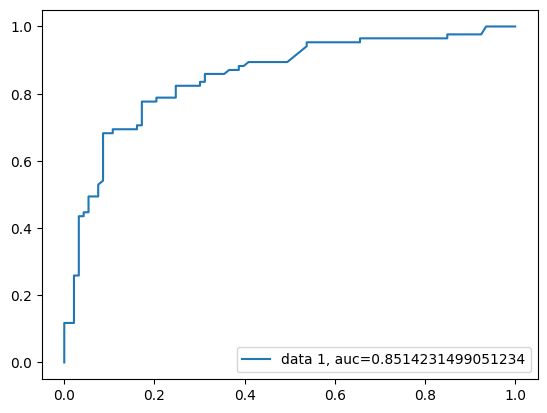

In [ ]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(y_true,  predictions) #False positive (speficifity) and true positive (sensitivity) rate
auc = metrics.roc_auc_score(y_true, predictions) 
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()